#Creación de dataframes y limpieza de datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#Leemos el dataset de registro de "Ingresos y Egresos"

In [2]:
#Lectura del registro de los ingresos y egresos
egresos_ingresos = pd.read_csv("/content/drive/MyDrive/finanzas_proyecto/egresos_ingresos.csv", sep="|",index_col=0)

egresos_ingresos.head()


,Fecha,Tipo,Categoria,Concepto,Cantidad
1,1/7/2021,Egreso,Alimentos,Comidas fuera,$130.00
2,1/7/2021,Egreso,Alimentos,Comidas fuera,$130.00
3,1/7/2021,Egreso,Alimentos,Comidas fuera,$50.00
4,1/7/2021,Egreso,Personal,Ropa,$641.00
5,5/7/2021,Ingreso,Trabajo,Vales,"$2,700.00"


In [3]:
#Agregamos la columna fuente para un futuro hacer un merge con el presupuesto
egresos_ingresos.insert(0,"Fuente","egresos_ingresos",allow_duplicates=True)

fuente_ei = egresos_ingresos

In [4]:
#Validamos que se haya generado el data set completo
fuente_ei.head()

,Fuente,Fecha,Tipo,Categoria,Concepto,Cantidad
1,egresos_ingresos,1/7/2021,Egreso,Alimentos,Comidas fuera,$130.00
2,egresos_ingresos,1/7/2021,Egreso,Alimentos,Comidas fuera,$130.00
3,egresos_ingresos,1/7/2021,Egreso,Alimentos,Comidas fuera,$50.00
4,egresos_ingresos,1/7/2021,Egreso,Personal,Ropa,$641.00
5,egresos_ingresos,5/7/2021,Ingreso,Trabajo,Vales,"$2,700.00"


In [5]:
#Cambiamos el formato fecha a yyyy-d-m
fuente_ei['Fecha'] = pd.to_datetime(fuente_ei.Fecha)

ei_formated = fuente_ei

In [6]:
#Ahora limpiamos la columana "Cantidad"
ei_formated['Cantidad'] = ei_formated['Cantidad'].str.replace('$','')
ei_formated['Cantidad'] = ei_formated['Cantidad'].str.replace(',','').astype(float)
ei_formated

ei_limpio = ei_formated



In [7]:
#Validamos que los cambios se hayan realizado correctamente
ei_limpio

,Fuente,Fecha,Tipo,Categoria,Concepto,Cantidad
1,egresos_ingresos,2021-01-07,Egreso,Alimentos,Comidas fuera,130.0
2,egresos_ingresos,2021-01-07,Egreso,Alimentos,Comidas fuera,130.0
3,egresos_ingresos,2021-01-07,Egreso,Alimentos,Comidas fuera,50.0
4,egresos_ingresos,2021-01-07,Egreso,Personal,Ropa,641.0
5,egresos_ingresos,2021-05-07,Ingreso,Trabajo,Vales,2700.0
...,...,...,...,...,...,...
74,egresos_ingresos,2021-05-25,Egreso,Salud,Doctor,500.0
75,egresos_ingresos,2021-05-29,Egreso,Alimentos,Comidas fuera,900.0
76,egresos_ingresos,2021-11-05,Egreso,Movilidad,Gasolina,1800.0
77,egresos_ingresos,2021-05-26,Egreso,Salud,Medicametos,200.0


#Leemos el data set del "Presupuesto Mensual"

In [8]:
#Leemos el presupuesto mensual
presupuesto = pd.read_csv("/content/drive/MyDrive/finanzas_proyecto/presupuesto.csv", sep="|", index_col=0)

presupuesto.head()



,Mes,Categoria,Subcategoria,Concepto,Cantidad
1,Julio-2021,Ingresos,Trabajo,Sueldo,"$14,560.00"
2,Julio-2021,Ingresos,Trabajo,Sueldo,"$14,560.00"
3,Julio-2021,Ingresos,Trabajo,Vales,"$2,740.00"
4,Julio-2021,Ingresos,Trabajo,Bono,$830
5,Julio-2021,Gastos Fijos,Hogar,Renta,"$6,000"


In [9]:
#Agregamos la columna fuente con su valor "presupuesto" para un futuro merge con egresos e ingresos
presupuesto.insert(0,"Fuente","presupuesto",allow_duplicates=True)

fuente_pre = presupuesto

In [10]:
#Validamos que se haya agreagdo de manera correcta
fuente_pre.head()

,Fuente,Mes,Categoria,Subcategoria,Concepto,Cantidad
1,presupuesto,Julio-2021,Ingresos,Trabajo,Sueldo,"$14,560.00"
2,presupuesto,Julio-2021,Ingresos,Trabajo,Sueldo,"$14,560.00"
3,presupuesto,Julio-2021,Ingresos,Trabajo,Vales,"$2,740.00"
4,presupuesto,Julio-2021,Ingresos,Trabajo,Bono,$830
5,presupuesto,Julio-2021,Gastos Fijos,Hogar,Renta,"$6,000"


In [11]:
#Cambiamos el formato fecha a yyyy-d-m
fuente_pre['Mes'] = fuente_pre['Mes'].str.replace('Julio','01-07')

pre_formated = fuente_pre

In [12]:
#Ahora limpiamos la columna "Cantidad"
pre_formated['Cantidad'] = pre_formated['Cantidad'].str.replace('$','')
pre_formated['Cantidad'] = pre_formated['Cantidad'].str.replace(',','').astype(float)

pre_limpio = pre_formated

In [13]:
pre_limpio.head()

,Fuente,Mes,Categoria,Subcategoria,Concepto,Cantidad
1,presupuesto,01-07-2021,Ingresos,Trabajo,Sueldo,14560.0
2,presupuesto,01-07-2021,Ingresos,Trabajo,Sueldo,14560.0
3,presupuesto,01-07-2021,Ingresos,Trabajo,Vales,2740.0
4,presupuesto,01-07-2021,Ingresos,Trabajo,Bono,830.0
5,presupuesto,01-07-2021,Gastos Fijos,Hogar,Renta,6000.0


Nota: para la limpieza de cantidad se cambiara a algo como esto data['nombre_col'] = data['nombre_col'].map(lambda x: x.lstrip('valor').rstrip('valor'))

#Merge the los dos datasets para su analisis

In [14]:
#Ponemos los dos dfs en una variable
frames = [pre_limpio, ei_limpio]

In [15]:
#Hacemos el merge de los dos
registro_presupuesto = pd.concat(frames)

In [16]:
registro_presupuesto.shape

(138, 8)

In [17]:
registro_presupuesto

,Fuente,Mes,Categoria,Subcategoria,Concepto,Cantidad,Fecha,Tipo
1,presupuesto,01-07-2021,Ingresos,Trabajo,Sueldo,14560.0,NaT,NaN
2,presupuesto,01-07-2021,Ingresos,Trabajo,Sueldo,14560.0,NaT,NaN
3,presupuesto,01-07-2021,Ingresos,Trabajo,Vales,2740.0,NaT,NaN
4,presupuesto,01-07-2021,Ingresos,Trabajo,Bono,830.0,NaT,NaN
5,presupuesto,01-07-2021,Gastos Fijos,Hogar,Renta,6000.0,NaT,NaN
...,...,...,...,...,...,...,...,...
74,egresos_ingresos,NaN,Salud,NaN,Doctor,500.0,2021-05-25,Egreso
75,egresos_ingresos,NaN,Alimentos,NaN,Comidas fuera,900.0,2021-05-29,Egreso
76,egresos_ingresos,NaN,Movilidad,NaN,Gasolina,1800.0,2021-11-05,Egreso
77,egresos_ingresos,NaN,Salud,NaN,Medicametos,200.0,2021-05-26,Egreso


#Analisis de Datos

In [18]:
ei_limpio.head()

,Fuente,Fecha,Tipo,Categoria,Concepto,Cantidad
1,egresos_ingresos,2021-01-07,Egreso,Alimentos,Comidas fuera,130.0
2,egresos_ingresos,2021-01-07,Egreso,Alimentos,Comidas fuera,130.0
3,egresos_ingresos,2021-01-07,Egreso,Alimentos,Comidas fuera,50.0
4,egresos_ingresos,2021-01-07,Egreso,Personal,Ropa,641.0
5,egresos_ingresos,2021-05-07,Ingreso,Trabajo,Vales,2700.0


In [26]:
#Analizaremos cuanto tenemos de remanente de la resta a Ingresos de Egresos

suma_in_egre = ei_limpio.groupby(by='Tipo').sum()

suma_in_egre


,Cantidad
Tipo,
Egreso,79278.27
Ingreso,98030.00


In [20]:
#Corregimos el nombre en tipo
ei_limpio['Tipo'] = ei_limpio['Tipo'].str.replace('Egrero','Egreso')

In [21]:
#Corregimos el nombre en tipo
ei_limpio['Tipo'] = ei_limpio['Tipo'].str.replace('Ingresos','Ingreso')

In [22]:
suma_in_egre = ei_limpio.groupby(by='Tipo').sum()

suma_in_egre

,Cantidad
Tipo,
Egreso,79278.27
Ingreso,98030.00


In [23]:
#Obtenemos la suma de Egresos
egresos_total = suma_in_egre.loc['Egreso','Cantidad']

In [24]:
#Obtenemos la suma de Ingresos
ingresos_total = suma_in_egre.loc['Ingreso','Cantidad']

In [25]:
#Remanente

remanente = ingresos_total - egresos_total
remanente

18751.729999999996

In [30]:
ei_limpio.groupby(by='Categoria').sum()

,Cantidad
Categoria,
Alimentos,23264.87
Alimentos,220.00
Deudas,12900.00
Entretenimiento,2679.00
Hogar,17729.00
Movilidad,2231.60
Movilidad,4100.00
Personal,2164.94
Prestamo,3000.00


In [33]:
new_df = ei_limpio [['Tipo','Concepto','Cantidad']]
new_df

,Tipo,Concepto,Cantidad
1,Egreso,Comidas fuera,130.0
2,Egreso,Comidas fuera,130.0
3,Egreso,Comidas fuera,50.0
4,Egreso,Ropa,641.0
5,Ingreso,Vales,2700.0
...,...,...,...
74,Egreso,Doctor,500.0
75,Egreso,Comidas fuera,900.0
76,Egreso,Gasolina,1800.0
77,Egreso,Medicametos,200.0


In [44]:
egreso_df = new_df.loc[new_df['Tipo'] == 'Egreso']

egreso_df.head()


,Tipo,Concepto,Cantidad
1,Egreso,Comidas fuera,130.0
2,Egreso,Comidas fuera,130.0
3,Egreso,Comidas fuera,50.0
4,Egreso,Ropa,641.0
6,Egreso,Despensa,348.0


In [50]:
#Sacamos un groupby del concepto y la suma de cantidad
concepto_totales = egreso_df.groupby(egreso_df['Concepto'].str.lower()).sum()

concepto_totales

,Cantidad
Concepto,
artículos de hogar,500.00
comidas fuera,3657.88
conexion gnp,448.95
despensa,19826.99
doctor,2000.00
electricidad,380.00
facebook,300.00
gas,2150.00
gasolina,4931.60


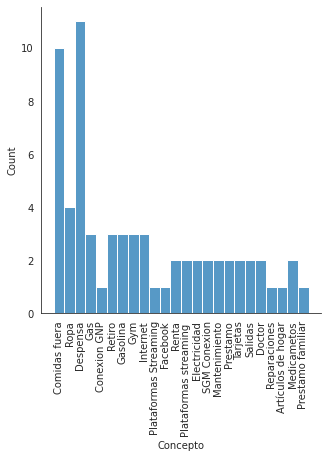

In [52]:
#creación del histograma
sns.set_style('white')
h = sns.displot(egreso_df['Concepto'], kde=False, bins=10)
h.set_xticklabels(rotation=90)